In [39]:
import sys
sys.path.append('../../src')

import pickle
from explainer.explainer import Explainer

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
model = pickle.load(open('model/model.pkl', 'rb'))
training_data = pickle.load(open('model/training_data.pkl', 'rb'))

In [3]:
explainer = Explainer(
    model,
    training_data,
    'target',
    regressor='linear',
    bounding_method='quantile',
)

In [7]:
results = []

In [8]:
results.append(explainer.explain(training_data.iloc[1], additional_threshold=-0.25))

  0%|          | 0/784 [00:00<?, ?it/s]

  8%|▊         | 59/784 [11:37<2:22:54, 11.83s/it]


In [11]:
results.append(explainer.explain(training_data.iloc[1]))

  8%|▊         | 64/784 [12:54<2:25:09, 12.10s/it]


In [12]:
results.append(explainer.explain(training_data.iloc[1], additional_threshold=0.25))

  9%|▉         | 70/784 [14:42<2:30:05, 12.61s/it]


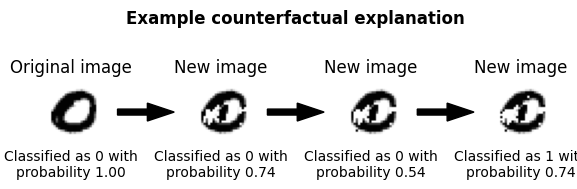

In [38]:
fig, axs = plt.subplots(1, 7)
plt.suptitle('Example counterfactual explanation',weight='bold')

# Plot the first image
axs[0].imshow(np.array(training_data.iloc[1][:-1]).astype(np.float32).reshape(28, 28), cmap='binary')
axs[0].set_title('Original image')
axs[0].set_xlabel(f'Classified as {model.predict(pd.DataFrame(training_data.iloc[1][:-1]).T)[0]} with\nprobability {model.predict_proba(pd.DataFrame(training_data.iloc[1][:-1]).T).max():.2f}')

# Add an arrow between the two images
axs[1].arrow(x=0.25, y=0.5, dx=0.5, dy=0, width=0.1, color='k')
axs[1].set_ylim([0, 1])

# Plot the second image
final = results[0][1].explanation_point
final[results[0][1].explainable_variable] = results[0][1].get_arg_extrema()
axs[2].imshow(np.array(final[:-1]).astype(np.float32).reshape(28, 28), cmap='binary')
axs[2].set_title('New image',)
axs[2].set_xlabel(f'Classified as {model.predict(pd.DataFrame(final[:-1]).T)[0]} with\nprobability {model.predict_proba(pd.DataFrame(final[:-1]).T).max():.2f}')

# Add an arrow between the two images
axs[3].arrow(x=0.25, y=0.5, dx=0.5, dy=0, width=0.1, color='k')
axs[3].set_ylim([0, 1])

# Plot the third image
final = results[1][1].explanation_point
final[results[1][1].explainable_variable] = results[1][1].get_arg_extrema()
axs[4].imshow(np.array(final[:-1]).astype(np.float32).reshape(28, 28), cmap='binary')
axs[4].set_title('New image',)
axs[4].set_xlabel(f'Classified as {model.predict(pd.DataFrame(final[:-1]).T)[0]} with\nprobability {model.predict_proba(pd.DataFrame(final[:-1]).T).max():.2f}')

# Add an arrow between the two images
axs[5].arrow(x=0.25, y=0.5, dx=0.5, dy=0, width=0.1, color='k')
axs[5].set_ylim([0, 1])

# Plot the fourth image
final = results[2][1].explanation_point
final[results[2][1].explainable_variable] = results[2][1].get_arg_extrema()
axs[6].imshow(np.array(final[:-1]).astype(np.float32).reshape(28, 28), cmap='binary')
axs[6].set_title('New image',)
axs[6].set_xlabel(f'Classified as {model.predict(pd.DataFrame(final[:-1]).T)[0]} with\nprobability {model.predict_proba(pd.DataFrame(final[:-1]).T).max():.2f}')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_aspect('equal')
    
plt.tight_layout()
fig.subplots_adjust(top=1.5)
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(left=0.1)
plt.savefig('../../figures/mnist_counterfactual_example.eps',bbox_inches='tight')
plt.show()